### 1.라이브러리 추가

In [1]:
import requests
from bs4 import BeautifulSoup 
from selenium import webdriver

import numpy as np
import pandas as pd

import time
from datetime import datetime

import nltk
from nltk.corpus import stopwords
from collections import Counter

### 2. 데이터 크롤링

In [2]:
# 시작 페이지
current_call = 1
# 마지막 페이지
last_call = 34

# 빈 list 만들기

recipe_url = []
recipe_title = []
recipe_time = []
recipe_ingredient = []
recipe_scrap = []
recipe_tag = []
recipe_img = []

# while 조건문으로 루프 실행 후 빠져나오기
while current_call <= last_call:

    url = "https://haemukja.com/recipes?utf8=%E2%9C%93&category_group2%5B%5D=60&category_group4%5B%5D=167&page=" + str(current_call)
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    web = requests.get(url, headers = headers).content
    source = BeautifulSoup(web, 'html.parser')
    
# 모든 'thmb' 태그에서 'href'만 가져와 url_list에 담기

    print('\n{}번째 페이지 크롤링을 시작합니다.'.format(current_call))
    
    url_list = []
    for urls in source.find_all('a', {'class': 'thmb'}):
        url_list.append("https://haemukja.com" + urls.attrs['href'])
    
    for url in url_list:
        try:
            # URL 설정         
            web = requests.get(url, headers = headers).content
            source = BeautifulSoup(web, 'html.parser')
            # 1) 레시피 타이틀
            title = source.find('div',{'class' : 'top'}).find('h1').find('strong').text

            # 함수 잘돌아가는지 확인해보고싶다면?
            print('Processing title : {}'.format(title))
            # 2) 레시피 조리시간
            cooking_time = source.find('dl', {'class' : 'info_basic'}).find('dd').get_text()

            # 3) 레시피 재료 => set 형태로 바꿔서 최종 리스트에 추가
            ingredient_list = []
            for ingredient in source.find('ul', {'class' : 'lst_ingrd'}).find_all('span'):
                ingredient_list.append(ingredient.get_text())
            # 4) 레시피 스크랩 횟수
            scrap = source.find('dd', {'id' : 'scrap-cnt'}).get_text()
    
            # 5) 레시피 태그 => set 형태로 바꿔서 최종 리스트에 추가
            tag_list = []
            for tag in source.find("div", {"class" : "box_tag"}).find_all('a'):
                tag_list.append(tag.get_text())
            # 6) 레시피 이미지
            #img_list = []
            #for a_tag in source.find_all('a', {'class' : 'thmb'}):
                #img_list.append(a_tag.find('img').attrs['src'])

            recipe_url.append(url)
            recipe_title.append(title)
            recipe_time.append(cooking_time)
            recipe_ingredient.append(set(ingredient_list))
            recipe_scrap.append(scrap)
            recipe_tag.append(set(tag_list))
#             recipe_img.append(image)

        except:
            print('*** 다음 링크의 레시피를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

    #     print('\n{}번째 페이지 크롤링이 완료 되었습니다.'.format(current_call))
    time.sleep(2)
    current_call += 1

recipe_df = pd.DataFrame({'Title' : recipe_title,
                          'Time' : recipe_time,
                          'Ingredient' : recipe_ingredient,
                          'Scrap' : recipe_scrap,
                          'URL': recipe_url,
                          'Tag' : recipe_tag})
recipe_df.to_excel('haemuk_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
recipe_df


1번째 페이지 크롤링을 시작합니다.
Processing title : 초간단 순두부계란국
Processing title : 어묵탕
Processing title : 얼큰수제비와 배추전
Processing title : 굴떡국
Processing title : 김치찌개 비법!
Processing title : 백종원 육개장
Processing title : 콩나물국밥
Processing title : 소고기 무국
Processing title : 돼지고기 김치찌개
Processing title : 콩나물국
Processing title : 도토리묵밥(묵사발)
Processing title : 된장찌개

2번째 페이지 크롤링을 시작합니다.
Processing title : 진짜 맛있는데 간단햄 부대찌개
*** 다음 링크의 레시피를 크롤링하는 중 에러가 발생했습니다 : https://haemukja.com/recipes/5850
Processing title : 청양새우젓콩나물국
Processing title : 콩물샤브샤브
Processing title : 매운당면찌개
Processing title : 새우완탕떡국
Processing title : 아욱국
Processing title : 버섯굴매운탕
Processing title : 낙지닭한마리전골
*** 다음 링크의 레시피를 크롤링하는 중 에러가 발생했습니다 : https://haemukja.com/recipes/5762
Processing title : 차돌박이고추장찌개
Processing title : 갈치조림

3번째 페이지 크롤링을 시작합니다.
Processing title : 백골뱅이탕
Processing title : 낙지 연포탕
Processing title : 김치찌개
Processing title : 콩나물국
Processing title : 닭볶음탕
Processing title : 닭갈비전골
Processing title : 해물크림나베
*** 다음 링크의 레시피를 크롤링하는 중 에러가 발

Processing title : Soupy Stir-fried Rice Cake
Processing title : 국물떡볶이
Processing title : 청국장
Processing title :  파프리카냉국

24번째 페이지 크롤링을 시작합니다.
Processing title : 냉이강된장
Processing title : 소고기된장찌개
Processing title : Spicy Braised Chicken with Kimchi
Processing title : 묵은지닭볶음탕
Processing title : Egg Soup
Processing title : 계란국
Processing title : 장수제비
Processing title : 매실묵사발
Processing title : 버섯매운탕
Processing title : 전주식콩나물국밥
Processing title : Bean Sprout Soup with Rice
Processing title : 깻잎김치수제비

25번째 페이지 크롤링을 시작합니다.
Processing title : Kimchi Perilla Leaf Sujebi (Hand-Torn Noodle Soup)
Processing title : 만두전골
Processing title : 부대찌개
Processing title : Budae-Jigae (Troop Stew)
Processing title : 해물순두부찌개
Processing title : 시래기들깨탕
Processing title : 버섯 뚝배기 불고기
Processing title : 냉이된장국
Processing title : 순대국
Processing title : 소고기 숙주전골
*** 다음 링크의 레시피를 크롤링하는 중 에러가 발생했습니다 : https://haemukja.com/recipes/1894
Processing title : 부대찌개

26번째 페이지 크롤링을 시작합니다.
Processing title : 전찌개
Processing title

,Title,Time,Ingredient,Scrap,URL,Tag
0,초간단 순두부계란국,5분,"{쪽파, 해물다시팩, 진간장, 순두부, 국간장, 계란, 설탕, 소금, 깨, 다진마늘...",399,https://haemukja.com/recipes/5972,"{콩/두부 요리, 달걀/유제품 요리, 아이 성장/발육 , 5분 요리, 한식 요리, ..."
1,어묵탕,20분,"{청경채, 대파, 국간장, 멸치, 다시마, 양파, 종합어묵팩, 건새우, 건고추, 소...",111,https://haemukja.com/recipes/5960,"{술안주, 자취 초보 요리, 한식 요리, 실생활 요리, 수산가공품, 국/탕요리, 손..."
2,얼큰수제비와 배추전,20분,"{애호박, 대파, 멸치육수팩, 감자, 밀가루, 소금, 양파, 고추장, 고춧가루, 부...",217,https://haemukja.com/recipes/5947,"{혼밥 요리, 채소류 요리, 간단 재료 요리, 동영상 레시피, 피부 재생, 아이 성..."
3,굴떡국,20분,"{떡국 떡, 해물다시팩, 국간장, 계랸, 소금, 대파 흰부분, 다진마늘, 굴}",11,https://haemukja.com/recipes/5945,"{파티/명절요리, 혼밥 요리, 간단 재료 요리, 동영상 레시피, 자취 초보 요리, ..."
4,김치찌개 비법!,30분,"{김치, 대파, 사골육수, 설탕, 양파, 소금, 두부, 돼지 앞다리살, 멸치가루, ...",79,https://haemukja.com/recipes/5949,"{혼밥 요리, 돼지고기, 간단 재료 요리, 찌개요리, 자취 초보 요리, 한식 요리,..."
...,...,...,...,...,...,...
395,알탕,50분,"{다진생강, 고추가루, 대파, 새우젓갈 (다진것), 국간장, 대구내장 (알+고니),...",387,https://haemukja.com/recipes/121,"{국/탕요리, 실생활 요리, 수산물, 한식 요리}"
396,순두부찌개,30분,"{김치, 대파, 순두부, 계란, 해감한 바지락, 청홍고추}",2641,https://haemukja.com/recipes/122,"{혼밥 요리, 콩/두부 요리, 찌개요리, 자취 초보 요리, 한식 요리, 실생활 요리}"
397,땅콩수프,80분,"{닭육수, 생강, 칠리 파우더, 감자, 마늘, 생땅콩, 당근, 소금, 커리파우더, ...",72,https://haemukja.com/recipes/59,"{면역력 강화, 한식 요리, 실생활 요리, 국/탕요리, 닭고기}"
398,두부젓국찌개,20분,"{애호박, 느타리버섯, 대파, 물, 새우젓, 두부, 청양고추, 모시조개}",312,https://haemukja.com/recipes/77,"{혼밥 요리, 콩/두부 요리, 찌개요리, 자취 초보 요리, 한식 요리, 실생활 요리}"


### 3. 데이터 전처리

#### - 재료 표기법 통일 예)'계란-달걀', '고추가루-고춧가루'
#### - 영문 데이터 처리 => 엑셀 파일로 편집

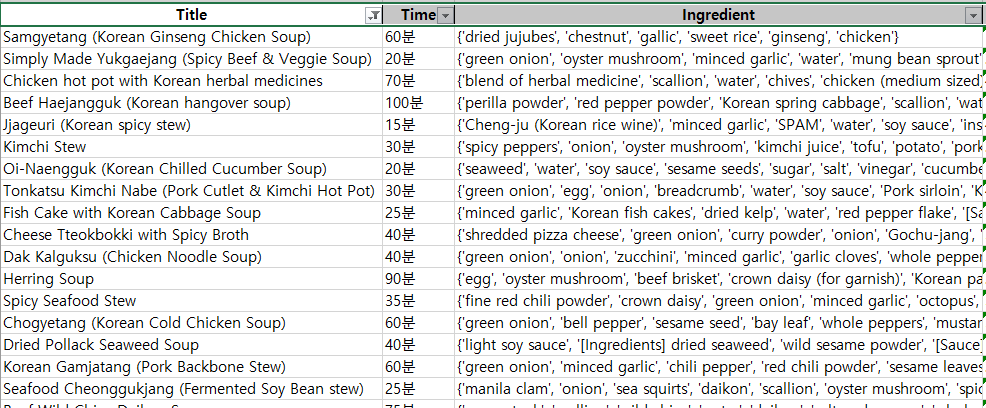

In [35]:
haemuk_df = pd.read_excel('haemuk_210115_0056.xlsx', encoding='utf-8')
haemuk_df.head()

,Title,Time,Ingredient,Scrap,URL,Tag
0,초간단 순두부계란국,5분,"['순두부', '계란', '쪽파', '국간장', '소금', '다진마늘', '해물다시...",322,https://haemukja.com/recipes/5972,"['국/탕요리', '실생활 요리', '한식 요리', '콩/두부 요리', '달걀/유제..."
1,어묵탕,20분,"['종합어묵팩', '대파', '양파', '무', '청양고추', '건고추', '청경채...",94,https://haemukja.com/recipes/5960,"['수산가공품', '국/탕요리', '술안주', '손님 접대 요리', '실생활 요리'..."
2,얼큰수제비와 배추전,20분,"['배추', '애호박', '고춧가루', '고추장', '밀가루', '부침가루', '소...",173,https://haemukja.com/recipes/5947,"['겨울', '국/탕요리', '실생활 요리', '한식 요리', '채소류 요리', '..."
3,굴떡국,20분,"['떡국 떡', '굴', '대파 흰부분', '계란', '해물다시팩', '다진마늘',...",8,https://haemukja.com/recipes/5945,"['수산물', '겨울', '국/탕요리', '파티/명절요리', '한식 요리', '자취..."
4,김치찌개 비법!,30분,"['김치', '돼지 앞다리살', '사골육수', '두부', '양파', '대파', '소...",65,https://haemukja.com/recipes/5949,"['돼지고기', '찌개요리', '김치요리', '실생활 요리', '한식 요리', '자..."


In [38]:
#데이터 형식
type(haemuk_df['Ingredient'][0])

str

In [39]:
# 빈 리스트 생성
data_igt = []
main_igt = []
sub_igt = []
tag_igt = []
full_igt = []
# str 형태의 데이터 처리 => list
for i in range(len(haemuk_df)):
    igt = list(haemuk_df['Ingredient'][i][2:-2].replace('[', '').replace(']', '')
               .replace(' ', '').replace('"', '').replace("'", '').split(','))
    tag = list(haemuk_df['Tag'][i][2:-2].replace(' ', '').replace('"', '').replace("'", '')
             .replace('(', ',').replace(')', '').split(','))
    tag_igt.append(set(tag))
    data_igt.append(igt)
# 전체 재료를 주재료-부재료로 slicing
    main_igt.append(set(data_igt[i][:2]))
    sub_igt.append(set(data_igt[i][2:]))
    
for igt in data_igt:
    full_igt.append(set(igt))

#### data_igt[0][:2] => set(main_igt)
#### data_igt[0][2:] => set(sub_igt)

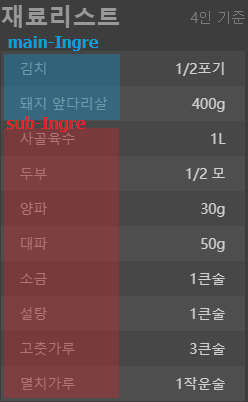

In [40]:
# 집합으로 변환한 데이터를 DataFrame에 적용하기
haemuk_df['main_Ingre'] = main_igt
haemuk_df['sub_Ingre'] = sub_igt
haemuk_df['Ingredient'] = full_igt
haemuk_df['Tag'] = tag_igt
haemuk_df.head()

,Title,Time,Ingredient,Scrap,URL,Tag,main_Ingre,sub_Ingre
0,초간단 순두부계란국,5분,"{소금, 고춧가루, 진간장, 해물다시팩, 순두부, 쪽파, 계란, 청양고추, 깨, 국...",322,https://haemukja.com/recipes/5972,"{간편메인반찬, 5분요리, 한식요리, 콩/두부요리, 다이어트요리, 국/탕요리, 10...","{계란, 순두부}","{소금, 고춧가루, 진간장, 해물다시팩, 쪽파, 청양고추, 깨, 국간장, 설탕, 다..."
1,어묵탕,20분,"{후추, 종합어묵팩, 소금, 국간장, 다진마늘, 대파, 다시마, 양파, 청양고추, ...",94,https://haemukja.com/recipes/5960,"{동영상레시피, 한식요리, 국/탕요리, 자취초보요리, 실생활요리, 수산가공품, 술안...","{대파, 종합어묵팩}","{후추, 소금, 국간장, 다진마늘, 다시마, 양파, 청양고추, 멸치, 건새우, 청경..."
2,얼큰수제비와 배추전,20분,"{고춧가루, 밀가루, 소금, 애호박, 대파, 고추장, 감자, 멸치육수팩, 양파, 배...",173,https://haemukja.com/recipes/5947,"{간편메인반찬, 빈혈예방, 동영상레시피, 겨울, 한식요리, 국/탕요리, 수유모건강,...","{배추, 애호박}","{고춧가루, 밀가루, 소금, 대파, 고추장, 감자, 멸치육수팩, 양파, 다진마늘, ..."
3,굴떡국,20분,"{소금, 국간장, 떡국떡, 굴, 해물다시팩, 대파흰부분, 계란, 다진마늘}",8,https://haemukja.com/recipes/5945,"{동영상레시피, 겨울, 한식요리, 국/탕요리, 자취초보요리, 수산물, 파티/명절요리...","{떡국떡, 굴}","{소금, 해물다시팩, 대파흰부분, 계란, 국간장, 다진마늘}"
4,김치찌개 비법!,30분,"{두부, 소금, 고춧가루, 대파, 양파, 김치, 돼지앞다리살, 멸치가루, 설탕, 사...",65,https://haemukja.com/recipes/5949,"{간편메인반찬, 김치요리, 동영상레시피, 한식요리, 자취초보요리, 간단재료요리, 찌...","{김치, 돼지앞다리살}","{두부, 소금, 고춧가루, 대파, 양파, 멸치가루, 설탕, 사골육수}"


In [41]:
# 'Scrap'을 index로 하여 내림차순으로 정렬
haemuk_df = haemuk_df.sort_values('Scrap', ascending=False)
haemuk_df.set_index('Scrap')
haemuk = haemuk_df.reset_index()
haemuk = haemuk.drop('index', axis = 1)

haemuk.head()

,Title,Time,Ingredient,Scrap,URL,Tag,main_Ingre,sub_Ingre
0,짜글이,15분,"{고추참치, 물, 고춧가루, 간장, 고추장, 만두, 청주, 다진마늘, 스팸}",38685,https://haemukja.com/recipes/2636,"{김치요리, 만두요리, 15분요리, 동영상레시피, 한식요리, 국/탕요리, 자취초보요...","{만두, 스팸}","{고추참치, 물, 고춧가루, 간장, 고추장, 청주, 다진마늘}"
1,돼지고기짜글이,20분,"{후추, 매실청, 고춧가루, 소금, 고추장, 양파, 새송이버섯, 청양고추, 다진마늘...",22089,https://haemukja.com/recipes/2506,"{간식/야식, 한식요리, 자취초보요리, 찌개요리, 혼밥요리, 면역력강화, 실생활요리...","{양파, 돼지고기}","{후추, 매실청, 고춧가루, 소금, 고추장, 새송이버섯, 청양고추, 다진마늘}"
2,닭볶음탕,30분,"{후추, 닭(볶음탕용), 고춧가루, 간장, 감자, 당면, 양파, 파, 다진마늘, 설탕}",16678,https://haemukja.com/recipes/1037,"{한식요리, 움짤레시피, 국/탕요리, 닭고기, 술안주}","{닭(볶음탕용), 양파}","{후추, 고춧가루, 간장, 감자, 당면, 파, 다진마늘, 설탕}"
3,차돌 된장찌개,30분,"{된장, 두부, 애호박, 고추장, 팽이버섯, 양파, 차돌박이}",14085,https://haemukja.com/recipes/2808,"{동영상레시피, 겨울, 한식요리, 콩/두부요리, 국/탕요리, 자취초보요리, 찌개요리...","{두부, 차돌박이}","{된장, 애호박, 고추장, 팽이버섯, 양파}"
4,부대찌개,30분,"{프랑크소시지, 물, 라면사리, 베이크드빈통조림, 건멸치큰것, 대파, 당면, 양파,...",13961,https://haemukja.com/recipes/1055,"{한식요리, 햄/소시지, 자취초보요리, 찌개요리, 술안주}","{프랑크소시지, 스팸}","{물, 라면사리, 베이크드빈통조림, 건멸치큰것, 대파, 당면, 양파, 김치}"


### 4. 조건에 맞는 리스트 생성하기

In [70]:
# inputdata 생성하기
data_main = []
data_sub = []
data_drop = []

# 주재료 생성하기
while (len(data_main) < 2) :
    main_input = input('주재료를 입력하세요. :')
    if (main_input != 'q'):
        data_main.append(main_input)
    elif (main_input == 'q' and len(data_main) == 0):
        print('주재료는 1개 이상 입력해주세요.')
    else :
        break

# 부재료 생성하기
while True :
    sub_input = input('부재료를 입력하세요. :')
    
    if (sub_input == 'q'):
        break
                
    else :
        data_sub.append(sub_input)

# 재외할 재료 생성하기
while True :
    drop_input = input('제외할 재료를 입력하세요. :')
    
    if (drop_input == 'q'):
        break
                
    else :
        data_drop.append(drop_input)
        
# 집합 형태로 변환        
data_main = set(data_main)
data_sub = set(data_sub)
data_drop = set(data_drop)

print('선택하신 주재료는 : {} 입니다.'.format(data_main))
print('선택하신 부재료는 : {} 입니다.'.format(data_sub))
print('제외할 재료는 : {} 입니다.'.format(data_drop))

주재료를 입력하세요. :김치
주재료를 입력하세요. :q
부재료를 입력하세요. :대파
부재료를 입력하세요. :스팸
부재료를 입력하세요. :q
제외할 재료를 입력하세요. :다진마늘
제외할 재료를 입력하세요. :간장
제외할 재료를 입력하세요. :당근
제외할 재료를 입력하세요. :q
선택하신 주재료는 : {'김치'} 입니다.
선택하신 부재료는 : {'스팸', '대파'} 입니다.
제외할 재료는 : {'다진마늘', '간장', '당근'} 입니다.


### 5. 조건에 맞는 데이터 출력하기

In [ ]:
[조건문 요구사항]
1. 주재료, 부재료, 제외할 재료를 입력 받을 수 있는 input 생성하기
- 주재료는 최대 2개까지 입력 가능하며, 반드시 1개 이상 입력해야함
- 입력된 주재료가 < 1 일때 break 시도 시 '주재료는 1개 이상 입력해주세요' 라는 경고 메세지 띄우기
- 부재료, 제외할 재료는 break 가능

2. 주재료, 부재료를 입력 받았을때 1차로 필터링하기 
- 'set type'의 interjection 활용 
- 부재료가 입력되지 않았을때 주재료로만 필터링하기

3. 제외할 재료를 입력받았을때 1차로 필터링된 항목안에서 찾기
- 'set type'의 difference 활용

4. 사용자 입력조건에 맞는 데이터 출력하기
- 최종 출력 데이터에 'Title', 'Time', 'Ingredient', 'Scrap', 'URL' 포함

In [71]:

# 빈 리스트 생성하기
title = []
time = []
scrap = []
url = []
tag = []
ingre = []
sub_ingre = []

# DataFrame으로 출력하기
for i in range(len(haemuk)):

    if len(data_sub) != 0 :
# input data를 받아서 교집합이 True인 경우 빈 리스트에 추가
        if (data_main & haemuk['main_Ingre'][i]) and (data_sub & haemuk['sub_Ingre'][i]):
            title.append(haemuk['Title'][i])
            time.append(haemuk['Time'][i])
            url.append(haemuk['URL'][i])
            scrap.append(haemuk['Scrap'][i])
            tag.append(haemuk['Tag'][i])
            ingre.append(haemuk['Ingredient'][i])
            sub_ingre.append(haemuk['sub_Ingre'][i])
    else:
        if (data_main & haemuk['main_Ingre'][i]):
            title.append(haemuk['Title'][i])
            time.append(haemuk['Time'][i])
            url.append(haemuk['URL'][i])
            scrap.append(haemuk['Scrap'][i])
            tag.append(haemuk['Tag'][i])
            ingre.append(haemuk['Ingredient'][i])
            sub_ingre.append(haemuk['sub_Ingre'][i])


main_df = pd.DataFrame({'Title':title,
                          'Time':time,
                          'Ingredient':ingre,
                          'sub_Ingre':sub_ingre,
                          'Tag':tag,
                          'Scrap':scrap,
                          'URL':url})

print('{}, {}를 재료로 하는 {}개의 리스트 입니다.'.format(data_main, data_sub, len(main_df)))
main_df


{'김치'}, {'스팸', '대파'}를 재료로 하는 9개의 리스트 입니다.


,Title,Time,Ingredient,sub_Ingre,Tag,Scrap,URL
0,부대찌개,20분,"{두부, 대파, 후랑크소세지, 사골라면, 쌈장, 김치, 비엔나}","{대파, 후랑크소세지, 사골라면, 쌈장, 비엔나}","{김치요리, 동영상레시피, 한식요리, 햄/소시지, 자취초보요리, 찌개요리, 실생활요...",9626,https://haemukja.com/recipes/1988
1,베이컨 김치찌개,20분,"{대파, 양파, 청양고추, 김치, 베이컨}","{청양고추, 양파, 대파}","{김치요리, 한식요리, 움짤레시피, 자취초보요리, 간단재료요리, 찌개요리, 실생활요...",9337,https://haemukja.com/recipes/2204
2,돼지고기김치찌개,30분,"{두부, 마늘, 물, 식초, 대파, 김치, 청양고추, 돼지고기}","{두부, 마늘, 물, 식초, 대파, 청양고추}","{간편메인반찬, 김치요리, 한식요리, 자취초보요리, 찌개요리, 면역력강화, 실생활요리}",4244,https://haemukja.com/recipes/1338
3,콩나물 김칫국,5분,"{콩나물, 소금, 대파, 김치, 국물멸치}","{소금, 국물멸치, 대파}","{빈혈예방, 김치요리, 5분요리, 한식요리, 국/탕요리, 해장요리, 채소류요리, 자...",2417,https://haemukja.com/recipes/5063
4,차돌박이 김치찌개,25분,"{두부, 대파, 양파, 김치, 차돌박이}","{두부, 양파, 대파}","{김치요리, 한식요리, 움짤레시피, 찌개요리, 실생활요리}",2076,https://haemukja.com/recipes/4140
5,부대찌개,40분,"{마늘, 물, 치즈, 라면사리, 고춧가루, 대파, 프랑크소세지, 호박, 양파대, 베...","{마늘, 물, 라면사리, 고춧가루, 대파, 프랑크소세지, 호박, 양파대, 베이크드빈...","{한식요리, 햄/소시지, 찌개요리, 혼밥요리, 실생활요리}",1265,https://haemukja.com/recipes/1242
6,짜글이,15분,"{멸치육수, 돼지목살, 홍고추, 찌개양념, 모듬쌈채소, 대파, 애호박, 감자, 양파...","{멸치육수, 홍고추, 찌개양념, 모듬쌈채소, 대파, 애호박, 감자, 양파, 새송이버...","{산모건강, 간단재료요리, 아이성장/발육, 혼밥요리, 허리/관절건강, 불면증해소, ...",1201,https://haemukja.com/recipes/5275
7,부대찌개,20분,"{두부, 사골국, 대파, 비엔나소세지, 쌈장, 김치, 소세지}","{사골국, 대파, 비엔나소세지, 쌈장, 소세지}","{퓨전요리, 김치요리, 동영상레시피, 한식요리, 콩/두부요리, 햄/소시지, 자취초보...",372,https://haemukja.com/recipes/2972
8,김치찌개 비법!,30분,"{두부, 소금, 고춧가루, 대파, 양파, 김치, 돼지앞다리살, 멸치가루, 설탕, 사...","{두부, 소금, 고춧가루, 대파, 양파, 멸치가루, 설탕, 사골육수}","{간편메인반찬, 김치요리, 동영상레시피, 한식요리, 자취초보요리, 간단재료요리, 찌...",65,https://haemukja.com/recipes/5949


In [72]:
# 제외할 재료를 포함하지 않는 데이터 출력하기

for i in range(len(main_df)):
# data_drop의 교집합이 True인 경우 리스트에서 제거
    if (data_drop & main_df['Ingredient'][i]):

        title.remove(main_df['Title'][i])
        time.remove(main_df['Time'][i])
        url.remove(main_df['URL'][i])
        scrap.remove(main_df['Scrap'][i])
        ingre.remove(main_df['Ingredient'][i])

final_df = pd.DataFrame({'Title':title,
                          'Time':time,
                          'Ingredient':ingre,
                          'Scrap':scrap,
                          'URL':url})
print('{}를 제외한 {}개의 리스트 입니다.'.format(data_drop, len(final_df)))
final_df

{'다진마늘', '간장', '당근'}를 제외한 9개의 리스트 입니다.


,Title,Time,Ingredient,Scrap,URL
0,부대찌개,20분,"{두부, 대파, 후랑크소세지, 사골라면, 쌈장, 김치, 비엔나}",9626,https://haemukja.com/recipes/1988
1,베이컨 김치찌개,20분,"{대파, 양파, 청양고추, 김치, 베이컨}",9337,https://haemukja.com/recipes/2204
2,돼지고기김치찌개,30분,"{두부, 마늘, 물, 식초, 대파, 김치, 청양고추, 돼지고기}",4244,https://haemukja.com/recipes/1338
3,콩나물 김칫국,5분,"{콩나물, 소금, 대파, 김치, 국물멸치}",2417,https://haemukja.com/recipes/5063
4,차돌박이 김치찌개,25분,"{두부, 대파, 양파, 김치, 차돌박이}",2076,https://haemukja.com/recipes/4140
5,부대찌개,40분,"{마늘, 물, 치즈, 라면사리, 고춧가루, 대파, 프랑크소세지, 호박, 양파대, 베...",1265,https://haemukja.com/recipes/1242
6,짜글이,15분,"{멸치육수, 돼지목살, 홍고추, 찌개양념, 모듬쌈채소, 대파, 애호박, 감자, 양파...",1201,https://haemukja.com/recipes/5275
7,부대찌개,20분,"{두부, 사골국, 대파, 비엔나소세지, 쌈장, 김치, 소세지}",372,https://haemukja.com/recipes/2972
8,김치찌개 비법!,30분,"{두부, 소금, 고춧가루, 대파, 양파, 김치, 돼지앞다리살, 멸치가루, 설탕, 사...",65,https://haemukja.com/recipes/5949


### 그 외 추가 작업

In [63]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
from urllib import request
import os

options = Options()
options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe" 
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
word = input("먹고 싶은 음식: ")
url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=' + format(word)
driver.get(url)


imgs = driver.find_elements_by_css_selector('img._image')
links = []
for img in imgs:
    link = img.get_attribute('src')
    if 'http' in link:
        links.append(link)
for index, link in enumerate (links):        
    start = link.rfind('.')
    end = link.rfind('&')
    filetype = link[start:end]
    print(filetype)
    filename = "{0}{1:03d}{2}".format(word, index,filetype)
    request.urlretrieve(link, filename)
# time.sleep(3)
# driver.quit()


먹고 싶은 음식: 된장찌개
